# **Analyzing Media: What Makes Movies Popular?**
**Names:** Rebecca Silberman and Raynah Jacobs

**Website Link:**
https://rsilberman23.github.io/datascienceproject/

**Project Goal:** As we are both fascinated by media, we want to investigate what makes movies popular. The question we want to answer is: What factors contribute to a film's popularity? Our goal is to investigate how elements such as budget, genre, critical score (IMDb and Metacritic), award recognition, and casting affect a film's performance. We define "popularity" through a combination of metrics including IMDb ratings, award nominations and wins, and box office earnings. Ultiamtely, by combining two datasets, one with financial and casting details, and another with user ratings, critic scores, and vote counts, we will identify patterns that have an impact on a film's popularity.

## **Description of Datasets**
We use two public datasets in this project, both from Kaggle.com, compiled from sources like IMDb, Metacritic, and box office reports:

**Dataset 1 - Movies (IMDb, Earnings, and More):**
https://www.kaggle.com/datasets/delfinaoliva/movies?resource=download

This dataset contains information on movie title, director, genre, cast (3 members), budget, box office earnings, Oscar and Golden Globe nominations and wins, release year, and IMDb score. It provides significant details of how production-related variables affect film success, financially and critically.

**Dataset 2 - IMDb Top 1000 Movies and Ratings:**
https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

This dataset contains information on film's IMDb ratings, Metacritic scores, user vote counts, movie overviews, and cast/crew details. It provides crucial aspects of a film that allow us to measure audience engagement beyond financials.  

**Collaboration Plan:** Our collaboration plan is to split the tasks based on our strengths -- one person focused on loading, cleaning, and merging datasets, while the other focused on exploring visualizations and summary statistics. Through in-person meeting and virtual meetings, we make conclusions based on our findings and visualizations, ensuring that our conclusions reflect our shared understanding of the data.

## **Extraction, Transform, and Load**

In [1]:
# Mount my drive to access data set
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/data/AnalyzingMedia_WhatMakesMoviesPopular.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/data/AnalyzingMedia_WhatMakesMoviesPopular.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 361518 bytes to /content/drive/MyDrive/data/AnalyzingMedia_WhatMakesMoviesPopular.html


In [3]:
# Load first dataset
import pandas as pd
file_path = "/content/drive/MyDrive/data/movies_data.csv"
df1 = pd.read_csv(file_path, encoding = 'latin-1')

In [4]:
# Load second dataset
df2 = pd.read_csv("/content/drive/MyDrive/data/imdb_top_1000.csv")

In [5]:
# Standardize column names
df1.columns = df1.columns.str.lower().str.replace(' ', '_')
df2.columns = df2.columns.str.lower().str.replace(' ', '_')

In [6]:
# Rename columns for merging
df1 = df1.rename(columns={'movie': 'title', 'actor_1': 'lead_actor', 'actor_2': 'supporting_actor'})
df2 = df2.rename(columns={'series_title': 'title','released_year': 'release_year','star1': 'lead_actor', 'star2': 'supporting_actor'})

In [7]:
# Merge and tidy datasets
merged_df = pd.merge(df1, df2, on='title', how='left')
merged_df = merged_df.dropna(subset=['imdb_rating'])
merged_df = merged_df.drop(columns=['overview', 'certificate', 'box_office','earnings','imdb_score','runtime','release_year_x', 'genre_y', 'director_y', 'poster_link','lead_actor_y', 'supporting_actor_y', 'actor_3', 'star3', 'star4', 'actors_box_office_%', 'director_box_office_%'])
merged_df = merged_df.rename(columns={'release_year_y':'release_year','genre_x': 'genre', 'director_x': 'director', 'lead_actor_x': 'lead_actor', 'supporting_actor_x': 'supporting_actor', 'oscar_and_golden_globes_nominations':'award_nominations', 'oscar_and_golden_globes_awards': 'awards'})
merged_df['meta_score'] = merged_df['meta_score'].fillna(0)
merged_df.head()

,title,director,running_time,lead_actor,supporting_actor,genre,budget,award_nominations,awards,release_year,imdb_rating,meta_score,no_of_votes,gross
12,300,Zack Snyder,117,Gerard Butler,Michael Fassbender,Action,65000000,0,0.0,2006,7.6,52.0,732876.0,"210,614,939"
150,Blow,Ted Demme,124,Johnny Depp,Ethan Suplee,Biography,30000000,0,0.0,2001,7.6,52.0,240714.0,"52,990,775"
206,Clerks,Kevin Smith,102,Jason Mewes,Brian O'Halloran,Comedy,230000,0,0.0,1994,7.7,70.0,211450.0,"3,151,130"
223,Control,Anton Corbijn,122,Sam Riley,Samantha Morton,Biography,6400000,0,0.0,2007,7.7,78.0,61609.0,"871,577"
225,Coraline,Henry Selick,100,Jennifer Saunders,Dawn French,Animation,60000000,0,0.0,2009,7.7,80.0,197761.0,"75,286,229"


In [8]:
# Ensure correct data types
merged_df['release_year'] = pd.to_numeric(merged_df['release_year'], errors='coerce')
merged_df['release_year'] = merged_df['release_year'].fillna(0).astype('int64')
merged_df['gross'] = merged_df['gross'].str.replace(',', '', regex=True)
merged_df['gross'] = merged_df['gross'].str.replace('$', '', regex=True)
merged_df['gross'] = pd.to_numeric(merged_df['gross'], errors='coerce')
merged_df = merged_df.dropna(subset=['gross'])
merged_df.dtypes

,0
title,object
director,object
running_time,int64
lead_actor,object
supporting_actor,object
genre,object
budget,int64
award_nominations,int64
awards,float64
release_year,int64


**What is this data?**
Our merged dataset contains information about popular movies, combining both the production and engagement details. More specifically, it includes the data on the movie titles, directors, genres, top actors, budget, award nominations and wins, release year,  IMDb ratings, Metacritic scores, user vote counts, and gross earnings. This merged dataset provides a well-rounded view of information on how the movie was made and how it was receieved by audiences.

**How can it be used to answer the question?**
Our research question focuses on what makes a movie popular. Using this dataset, we can determine the various factors such as budget, genre, runtime, critic scores, and award recognitions relate to audience ratings, user vote counts, and financial success. Through analyzing patterns and correlations across these variables, we can come to conclusions about which elements consistently associate with movie popularity.

## **Exploratory Data Analysis**

### **Summary Statistics**

In [9]:
merged_df.describe()

,running_time,budget,award_nominations,awards,release_year,imdb_rating,meta_score,no_of_votes,gross
count,408.000000,4.080000e+02,408.000000,406.000000,408.000000,408.000000,408.000000,4.080000e+02,4.080000e+02
mean,128.372549,4.689984e+07,5.000000,1.894089,1990.769608,7.953431,76.095588,4.822474e+05,1.026420e+08
std,32.095350,5.641408e+07,4.862735,2.722764,100.393848,0.319994,13.847651,3.938297e+05,1.135791e+08
min,37.000000,1.140000e+05,0.000000,0.000000,0.000000,7.600000,0.000000,3.122200e+04,6.013000e+03
25%,107.000000,9.000000e+06,1.000000,0.000000,1987.750000,7.700000,69.000000,1.972365e+05,2.439397e+07
50%,122.000000,2.500000e+07,4.000000,1.000000,2001.000000,7.900000,78.000000,3.731675e+05,5.743517e+07
75%,143.000000,6.000000e+07,8.000000,3.000000,2008.250000,8.100000,86.000000,6.573315e+05,1.413250e+08
max,289.000000,2.600000e+08,22.000000,13.000000,2019.000000,9.300000,100.000000,2.343110e+06,7.605076e+08


**Explanation of Summary Statistics:**
The table above showcases the basic summary statistics for key variables related to movie popularity such as runtime, budget, award nominations and wins, IMDb rating, Metacritic score, number of votes, and gross earning. Some statistics worth highlighting are:


*   The average **IMDb rating** is around 7.95 with most movies falling between 7.7 and 8.1. This seemingly high average rating proves that there is a high standard among the films in the dataset.
*   The average **budget** is approx. 46,899,840 dollars, with a minimum of only 114,000 dollars and a maximum of 260,000,000 dollars. This range being wide demonstrates the inclusion of a variety of films like independent and blockbusters included in this dataset.
*   The mean **gross revenue** is about 102,641,962 dollars, ranging from as low as 6,013 dollars to a high of 760,507,625 dollars, reflecting the huge spread in earning success among these films.
*   Films receive, on average, 5 **award nominations**, with some earning as many as 22, indicating that a small number of films receieve a lot of recognition.
*   The mean number of **awards won** is 1.89, but the maximum is 13, proving that although many films win no awards, some do achieve many wins.
*   The average **Metacritic score** is 76.1, with a low of 0 and a perfect score of 100, showing the completely wide range of critiques for the films in the dataset.
*   Films have a mean of about 482,247 **IMDb votes**, with top movies receiving over 2300000 and the lowest getting 31222, highlighting a strong audience engagement across all films.
*   The average **running time** is approx. 128 minutes, with most films running from 107 to 143 minutes.

After analyzing these summary statistics, it is prevalent that gross earnings, number of votes, awards, and IMDb ratings show the most variance among the elements in the dataset. These aspects could be strong predictors of a film's popularity, so we will engage with them further by creating visualizations and correlation testing to make conclusions.  

### **Visualizations**

To further explore these relationships, we will create visualizations that highlight trends, correlations, and distributions in our dataset. With these graphs, we can continue to determine which variables are most strongly connected to success to guide our modeling questions moving forward.

In [10]:
import matplotlib.pyplot as plt

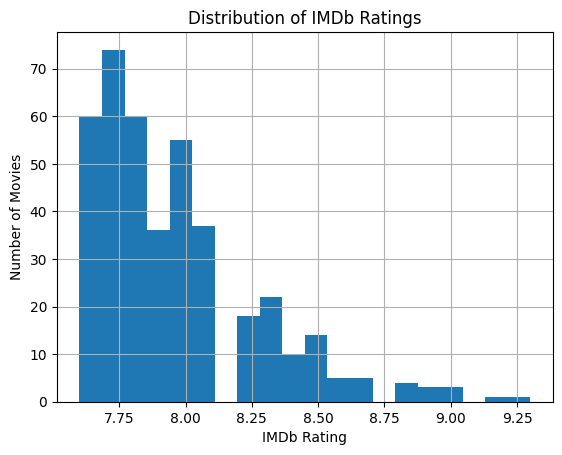

In [11]:
# Histogram: IMDb Rating Distribution
merged_df['imdb_rating'].hist(bins=20)
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of IMDb Ratings')
plt.show()

The above histogram displays the distribution of IMDb ratings across all movies in the merged dataset. Each bar represents the number of movies within a specific IMDb rating range. This visualization graph illustrates the distribution of IMDb ratings.

Analyzing the distribution allows us to identify whether the dataset is skewed toward highly-rated movies, or if there’s a broader range. Understanding this pattern gives us a better idea of rating variability, a potential predictor of a movie’s success.
It also sets a baseline for comparison with other variables like revenue, genre, or runtime.

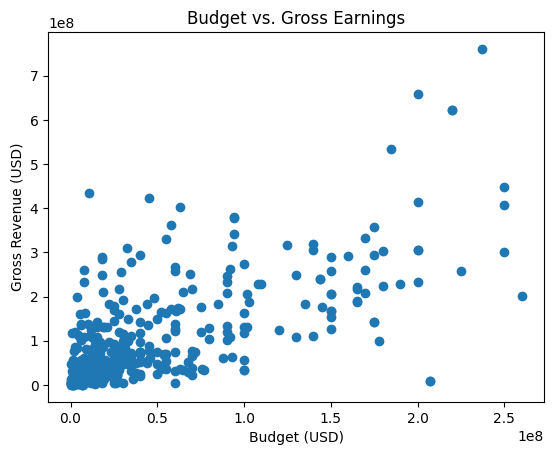

In [12]:
# Scatterplot: Budget vs. Gross
plt.scatter(merged_df['budget'], merged_df['gross'])
plt.xlabel('Budget (USD)')
plt.ylabel('Gross Revenue (USD)')
plt.title('Budget vs. Gross Earnings')
plt.show()

This scatterplot illustrates the relationship between a movie's budget and its gross revenue. Each point on the graph represents a single movie, with its position determined by how much it cost to make (x-axis) and how much the movie earned (y-axis).

The graph helps us understand whether there's a positive correlation between budget and revenue. Identifying this trend allows to evaluate whether investing more money into a film is associated with films being higher grossing or not. This inference will be a valuable insight for our modeling process.

The scatterplot also reveals outliers in the data, which helps us analyze which other variables might have an influence on a movie's success.



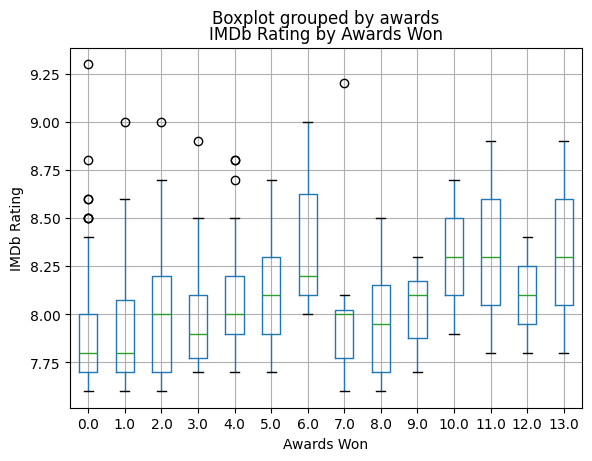

In [13]:
# Boxplot: IMDb Rating by Awards Won
merged_df.boxplot(column='imdb_rating', by='awards')
plt.xlabel('Awards Won')
plt.ylabel('IMDb Rating')
plt.title('IMDb Rating by Awards Won')
plt.show()

The boxplot above compares IMDb ratings based on whether or not a movie's won awards. The x-axis represents the awards (a categorical variable with two categories, yes or no), and on the y-axis, we've put the movie's IMDb rating.

The boxplot helps illustrate the distribution, median, and spread of the IMDb Rating across different groups--movies with awards and those without. The graph above helps us make determinations about whether award-winning movies tend to have higher IMDb ratings than those that haven’t won awards. Looking at this visualization highlights differences in average ratings as well as the variability of ratings within each group, which will help us determine whether or not critical acclaim aligns with audience/reviewer ratings.

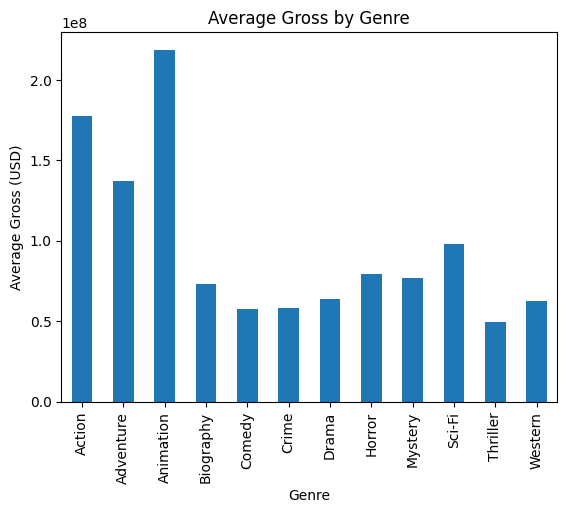

In [14]:
# Bar Chart: Average Gross by Genre
genre_gross = merged_df.groupby('genre')['gross'].mean()
genre_gross.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Gross (USD)')
plt.title('Average Gross by Genre')
plt.show()

The bar chart above shows the average gross revenue for each movie genre. This graph groups the dataset by genre and calculates the mean gross earnings, thus highlighting which genres tend to perform better financially, on average.

This helps us spot trends in genre-based success (i.e. it reveals whether action or adventure films typically earn more than other genres), and these insights can help inform our predictive modeling by suggesting that genre is a strong predictor of a movie's financial success.

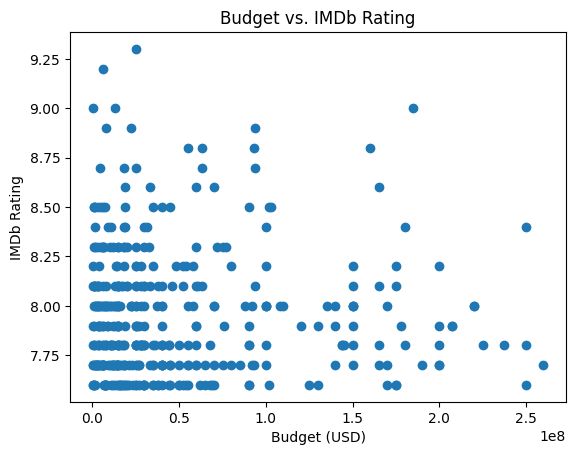

In [15]:
# Scatterplot: Budget vs IMDb Rating
plt.scatter(merged_df['budget'], merged_df['imdb_rating'])
plt.xlabel('Budget (USD)')
plt.ylabel('IMDb Rating')
plt.title('Budget vs. IMDb Rating')
plt.show()

This scatterplot illustrates the relationship between a movie’s budget and its IMDb rating. Each point represents one movie, with the x-axis showing how much money was spent to make the film, and the y-axis showing how well viewers rated it.

The graph inducates that investment in production value does not necessarily translate to better-rated movies.

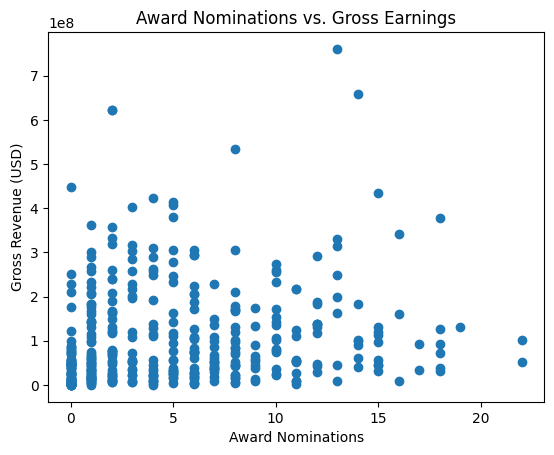

In [16]:
# Scatterplot: Award Nominations vs Gross
plt.scatter(merged_df['award_nominations'], merged_df['gross'])
plt.xlabel('Award Nominations')
plt.ylabel('Gross Revenue (USD)')
plt.title('Award Nominations vs. Gross Earnings')
plt.show()

This scatterplot illuminates the relationship between the number of award nominations a movie receives and  how much the movie makes. As with the graph above it, each dot represents a movie, this time with the x-axis showing how many award nominations it received and the y-axis showing how much money it earned.
Since the graph is not illustrating a clear positive between nominations are commercial success, it is hard to determine whether movies that recieve many awards also tend to perform well at the box office.

The graph does reveal a couple of outliers. There are a couple of films that earned significant revenue with few or no nominationsas well as a few critically acclaimed films that didn’t perform as well financially. Because the graph suggests that more award nominations do not necessarily lead to higher commercial success, and there are not an insignificant number of outliers, we will probably not include these variables as predictors in our future modeling efforts.

In [17]:
# Cross-tabulation
cross_tab = pd.crosstab(merged_df['genre'], merged_df['awards'] > 0)
cross_tab

awards,False,True
genre,,
Action,48,34
Adventure,20,20
Animation,7,13
Biography,19,33
Comedy,21,26
Crime,26,21
Drama,33,56
Horror,3,4
Mystery,1,1


The cross-tabulation above shows the count of movies within each genre split by whether or not they have won any awards. The rows represent different genres, while the two columns represent:

False: Movies in that genre that have not won awards

True: Movies that have won at least one award

This table helps us explore how awards are distributed across genres. It can reveal which genres are more likely to receive awards, and which genres are underrepresented in awards despite possibly being popular/commercially successful.
Measuring these correlations gives us insight into critical recognition patterns which will help us when making our modeling decisions.

## **Model Ideas**

**Model Idea #1:** Predict whether a movie will produce a gross revenue over $100 million using *logistic regression*.

As seen in our scatterplot, *Budget vs. Gross Earnings*, there is a clear trend that higher budget movies can gross more, but not always. This presents an interesting classification problem. Additionally, the bar chart of *Average Gross by Genre* proves that genre is a strong predictor of commerical success.

We plan to build a logistic regression model to predict whether a movie will gross over $100 million based on its budget, genre, IMDb rating, and other features. This model will allow us to identify which factors are most important for achieving major commercial success.

**Model Idea #2:** Predict a film's IMDb Rating using *multivariate linear regression*.

Our histogram, *IMDb Rating Distribution*, conveys that IMDb ratings are mostly clustered between 7.5 and 8.5 with some spread. Our boxplot, *IMDb Rating by Awards Won*, shows that more awards typically relate to higher ratings. Furthermore, our scatterplot, *Budget vs IMDb Rating*, emphasizes that there is little to no trend in budget predicting rating, but other features like awards, meta_score, genre, and votes might.

For this idea, we plan to build a multivariate linear regression model to predict a movie's IMDb rating using variables such as Metacritic score, award count, genre, and number of vots. This model will allow us to understand what makes a movie "popular" with audiences.